In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_pickle('Recipes_data_Dietary_Sim_Ingrs.pkl')

In [2]:
df.Ingredients[0]

['lime juice',
 'vanilla bean',
 'sugar substitute',
 'lime zest',
 'evaporated milk',
 'food coloring',
 'water',
 'limes',
 'gelatin flavored',
 'graham crackerswafers']

In [3]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: ' '.join(x))
df

,Title,Ingredients,Type
0,Alice's Key Lime Pie,lime juice vanilla bean sugar substitute lime ...,Diabetic
1,Carrot Cake Muffin Treats,raisins seedless nutmeg baking soda walnuts ca...,Diabetic
2,Creamy Cucumber Salad,vinegar garlic yogurt black pepper dill weed s...,Diabetic
3,Creamy Ranch Salad Dressing,oregano green onions yogurt cottage cheese gar...,Diabetic
4,Diabetic Blueberry Muffins,lemon zest blueberries biscuit baking mix bisq...,Diabetic
...,...,...,...
1864,Greek Pasta Salad,vinegar salt and black pepper oregano kalamata...,Standard
1865,Christmas Chocolate Petticoat Tails,cornstarch milk vanilla bean semisweet chocola...,Standard
1866,Parmesan Crackers,allpurpose flour water butter Parmesan cheese ...,Standard
1867,Pasta Puttanesca,olives garlic olive oil anchovy fillets italia...,Standard


In [4]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,Title,Ingredients,Type
0,Chevre and Portabello Mushroom Tarts,mushrooms olive oil black pepper allpurpose fl...,Standard
1,Shrimp Paesano,light cream halfhalf shrimp lemon garlic olive...,Standard
2,Homemade French Fried Onions,allpurpose flour black pepper thyme paprika ca...,Low-Fat
3,Cinnamon and Vanilla Oats,vanilla bean cherries cinnamon water almonds s...,Diabetic
4,Gluten-Free Casein-Free Lemon Raspberry Muffins,quinoa baking soda zucchini rye flour lemon ca...,Gluten-Free
...,...,...,...
1864,Carrots-Spicy and Sour,black bean sauce carrots olive oil rice vinega...,Low-Fat
1865,15 Minute Shrimp and Avocado Salad,romaine lettuce olive oil extravirgin shrimp g...,Standard
1866,Chopped Mediterranean Salad,sundried tomatoes romaine lettuce olive oil ex...,Low-Fat
1867,Stephen Lee's Zucchini-Pesto Muffins,egg whites zucchini basil olive oil extravirgi...,Standard


In [6]:
import numpy as np
np.unique(df.Type,return_counts=True)

(array(['Diabetic', 'Gluten-Free', 'Low-Carb', 'Low-Fat', 'Standard'],
       dtype=object),
 array([383, 304,  96, 463, 623]))

In [7]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Ingredients'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

result_df = pd.concat([df, tfidf_df], axis=1)

tfidf_df

,acini,acorn,active,added,adobo,aid,alamang,ale,alfalfa,allpurpose,...,xiao,xylito,yams,yeast,yellow,yogurt,yolks,your,zest,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.31296,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.231477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
1865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
1866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
1867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.242554


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['Type'], test_size=0.2, random_state=4,stratify=df['Type'])

In [9]:
np.unique(y_train,return_counts=True)

(array(['Diabetic', 'Gluten-Free', 'Low-Carb', 'Low-Fat', 'Standard'],
       dtype=object),
 array([307, 243,  77, 370, 498]))

In [10]:
np.unique(y_test,return_counts=True)

(array(['Diabetic', 'Gluten-Free', 'Low-Carb', 'Low-Fat', 'Standard'],
       dtype=object),
 array([ 76,  61,  19,  93, 125]))

Accuracy with KNN: 0.3181818181818182


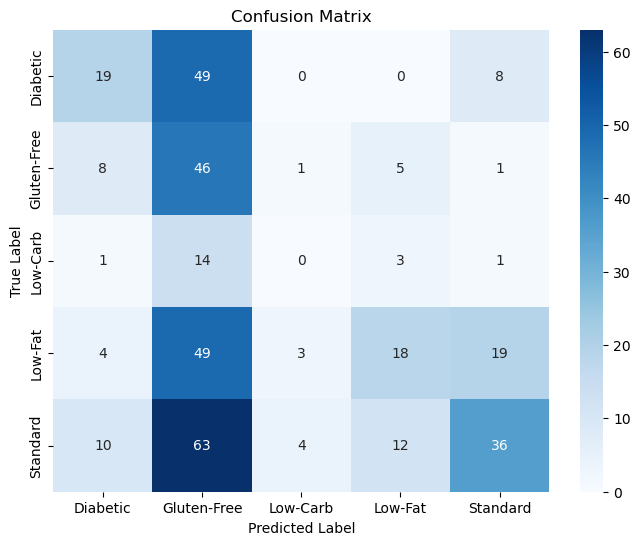

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"Accuracy with KNN: {knn_accuracy}")

knn_cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.44385026737967914


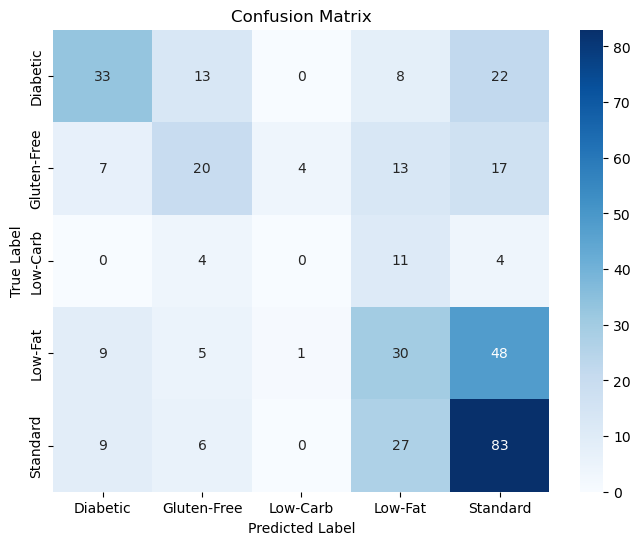

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy with SGD: 0.4786096256684492


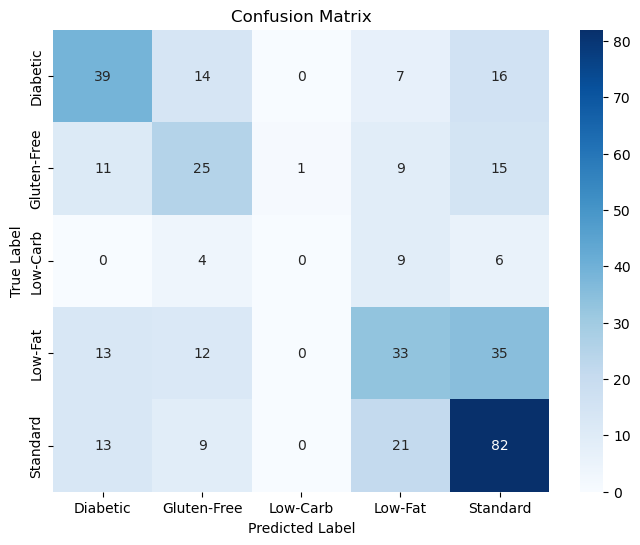

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss='log_loss')

sgd_classifier.fit(X_train, y_train)

sgd_predictions = sgd_classifier.predict(X_test)

sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"Accuracy with SGD: {sgd_accuracy}")
cm = confusion_matrix(y_test,sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Best Hyperparameters: {'alpha': 0.001, 'max_iter': 500, 'penalty': 'elasticnet'}
Accuracy with SGD (Best Hyperparameters): 0.5066666666666667


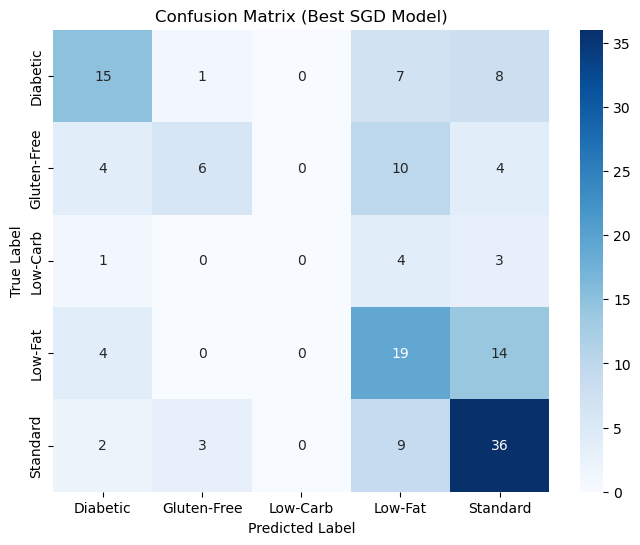

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [ 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [500,1000],
}

sgd_classifier = SGDClassifier(loss='log_loss', random_state=42)

grid_search = GridSearchCV(sgd_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_sgd_classifier = grid_search.best_estimator_
sgd_predictions = best_sgd_classifier.predict(X_val)

sgd_accuracy = accuracy_score(y_val, sgd_predictions)
print(f"Accuracy with SGD (Best Hyperparameters): {sgd_accuracy}")

cm = confusion_matrix(y_val, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_sgd_classifier.classes_, yticklabels=best_sgd_classifier.classes_)
plt.title('Confusion Matrix (Best SGD Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [23]:
sgd_predictions = best_sgd_classifier.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"Accuracy with SGD (Best Hyperparameters): {sgd_accuracy}")


Accuracy with SGD (Best Hyperparameters): 0.5053475935828877


Accuracy with NB: 0.45989304812834225


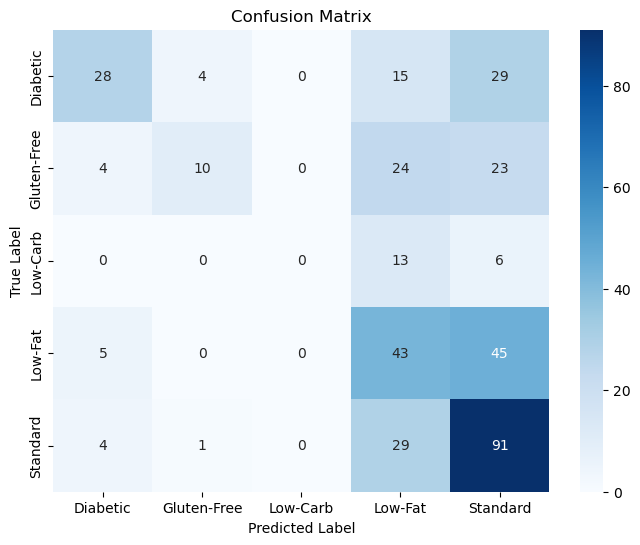

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

nb_predictions = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Accuracy with NB: {nb_accuracy}")
cm = confusion_matrix(y_test,nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy with XGBoost: 0.45187165775401067


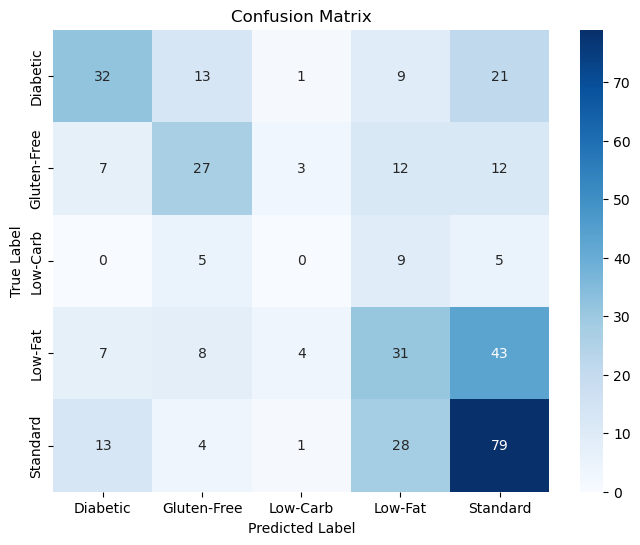

In [19]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train_encoded)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test_encoded, xgb_predictions)
print(f"Accuracy with XGBoost: {xgb_accuracy}")
cm = confusion_matrix(y_test_encoded,xgb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
import pickle

In [43]:
with open('sgd_classifier_Dietary.pkl', 'wb') as model_file:
    pickle.dump(best_sgd_classifier, model_file)

In [44]:
with open('sgd_classifier_Dietary.pkl', 'rb') as model_file:
     best_sgd_classifier = pickle.load(model_file)

In [45]:
new_ingredients = ['sugar','rice','salt']

new_ingredients_str = ' '.join(new_ingredients)

new_tfidf_features = tfidf_vectorizer.transform([new_ingredients_str])
new_tfidf_features
class_probabilities = best_sgd_classifier.predict_proba(new_tfidf_features)

for class_label, probabilities in zip(best_sgd_classifier.classes_, class_probabilities[0]):
    print(f"Probability for {class_label}: {probabilities:.4f}")

best_sgd_classifier.predict(new_tfidf_features)


Probability for Diabetic: 0.1347
Probability for Gluten-Free: 0.1145
Probability for Low-Carb: 0.0214
Probability for Low-Fat: 0.3498
Probability for Standard: 0.3797


array(['Standard'], dtype='<U11')

In [41]:
top_indices = [i for i, prob in enumerate(class_probabilities[0]) if prob > 0.30]

top_classes = best_sgd_classifier.classes_[top_indices]

if len(top_classes)==0:
    top_indices = class_probabilities.argsort()[0][-1:][::-1]
    top_classes = best_sgd_classifier.classes_[top_indices]
    
top_classes

array(['Low-Fat', 'Standard'], dtype='<U11')